In [3]:
import numpy as np
import pandas as pd
import geopandas as gp
import pandas_profiling
from datetime import datetime

# import seaborn as sb 
# import json
# from shapely.geometry import LineString, Polygon, Point
# from shapely import wkt

import matplotlib.pyplot as plt
%matplotlib inline

### display all columns
pd.set_option('display.max_columns', None)

In [4]:
df2019 = pd.read_csv('rawdata/MyLA311_Service_Request_Data_2019.csv')
df2019.head()

/home/xin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,Anonymous,AssignTo,ServiceDate,ClosedDate,AddressVerified,ApproximateAddress,Address,HouseNumber,Direction,StreetName,Suffix,ZipCode,Latitude,Longitude,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1262692791,01/01/2019 12:02:05 AM,01/04/2019 11:03:56 AM,SR Created,BOS,Bulky Items,Closed,Self Service,Self Service_SAN,NaN,N,NC,01/04/2019 12:00:00 AM,01/04/2019 11:03:56 AM,Y,N,"616 N GRAMERCY PL, 90004",616,N,GRAMERCY,PL,90004.0,34.082258,-118.312461,"(34.0822581437, -118.312461304)",593,H,7.0,Central APC,4.0,David Ryu,119.0,GREATER WILSHIRE NC,OLYMPIC
1,1-1262693531,01/01/2019 12:05:52 AM,01/01/2019 12:09:40 AM,SR Created,LADWP,Report Water Waste,Closed,Mobile App,Self Service,Android,N,NaN,NaN,01/01/2019 12:05:52 AM,Y,NaN,"11500 W SAN VICENTE BLVD, 90049","11,500",W,SAN VICENTE,BLVD,90049.0,34.052739,-118.461185,"(34.052739298, -118.461184916)",631,J,4.0,West Los Angeles APC,11.0,Mike Bonin,NaN,NaN,WEST LOS ANGELES
2,1-1262693571,01/01/2019 12:10:52 AM,01/03/2019 12:27:05 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,Self Service,NaN,N,WVA,01/02/2019 08:43:54 AM,01/03/2019 12:27:05 AM,Y,N,"9167 N RESEDA BLVD, 91324","9,167",N,RESEDA,BLVD,91324.0,34.236888,-118.536385,"(34.2368883475, -118.53638542)",500,J,7.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE
3,1-1262692831,01/01/2019 12:19:53 AM,01/07/2019 09:43:46 AM,SR Created,BOS,Illegal Dumping Pickup,Closed,Self Service,Self Service,NaN,N,WV,01/07/2019 12:00:00 AM,01/07/2019 09:39:12 AM,Y,N,"8752 N YOLANDA AVE, 91324","8,752",N,YOLANDA,AVE,91324.0,34.230222,-118.539758,"(34.2302221251, -118.539758291)",530,H,1.0,North Valley APC,12.0,Mitchell Englander,124.0,NORTHRIDGE SOUTH NC,DEVONSHIRE
4,1-1262692061,01/01/2019 12:28:15 AM,01/03/2019 12:28:19 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,Self Service,NaN,N,WVA,01/02/2019 10:12:35 AM,01/03/2019 12:28:19 AM,Y,N,"9055 N RESEDA BLVD, 91324","9,055",N,RESEDA,BLVD,91324.0,34.235078,-118.536392,"(34.2350781243, -118.536391683)",500,J,7.0,North Valley APC,12.0,Mitchell Englander,124.0,NORTHRIDGE SOUTH NC,DEVONSHIRE


In [5]:
df2019.shape

(1186428, 34)

In [6]:
df2019.CreatedDate.isna().sum()

0

In [7]:
df2019.ClosedDate.isna().sum()

36337

In [8]:
df2019.ServiceDate.isna().sum()

74540

In [9]:
df2019_open = df2019[df2019.Status == 'Open']
df2019_open.shape

(24199, 34)

In [10]:
# all open-status entries, selected by NA ServiceDates and non-NA CreatedDates

df2019_notServiced = df2019_open[df2019_open.ServiceDate.isna() & df2019_open.CreatedDate.notna()]
df2019_notServiced.shape

(7539, 34)

In [11]:
# all open-status entries, selected by NA ClosedDates and non-iNA CreatedDates

df2019_notClosed = df2019_open[df2019_open.ClosedDate.isna() & df2019_open.CreatedDate.notna()]
df2019_notClosed.shape

# there are significantly less NA ServiceDates than there are ClosedDates

(24199, 34)

In [13]:
dt_cols = ['CreatedDate','UpdatedDate','ServiceDate','ClosedDate']
for col in dt_cols:
    df2019_open[col] = pd.to_datetime(df2019_open[col])
    
df2019_open['ClosedDate_open'] = df2019_open['ClosedDate'].replace(to_replace=pd.NaT, value=datetime.now())
df2019_open['ServiceDate_open'] = df2019_open['ServiceDate'].replace(to_replace=pd.NaT, value=datetime.now())

/home/xin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/xin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [19]:
def dt_to_days(dt):
    if not pd.isnull(dt):
        num_days = pd.Timedelta.total_seconds(dt)/(24.*3600)
        if num_days <= .000001:
            return 0
        return pd.Timedelta.total_seconds(dt)/(24.*3600)
    else:
        return np.NaN

df2019_open['ClosedDiff'] = df2019_open.ClosedDate_open - df2019_open.CreatedDate
df2019_open['ServiceDiff'] = df2019_open.ServiceDate_open - df2019_open.CreatedDate
df2019_open['ClosedServiceDiff'] = df2019_open.ClosedDate_open - df2019_open.ServiceDate_open
df2019_open['ClosedDiff_Days'] = df2019_open.ClosedDiff.apply(dt_to_days)
df2019_open['ServiceDiff_Days'] = df2019_open.ServiceDiff.apply(dt_to_days)
df2019_open['ClosedServiceDiff_Days'] = df2019_open.ClosedServiceDiff.apply(dt_to_days)

df2019_open.head()

/home/xin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/xin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/xin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,Anonymous,AssignTo,ServiceDate,ClosedDate,AddressVerified,ApproximateAddress,Address,HouseNumber,Direction,StreetName,Suffix,ZipCode,Latitude,Longitude,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct,ClosedDate_open,ServiceDate_open,ClosedDiff,ServiceDiff,ClosedServiceDiff,ClosedDiff_Days,ServiceDiff_Days,ClosedServiceDiff_Days
146,1-1262715591,2019-01-01 09:41:28,2019-01-01 09:41:28,SR Created,OCB,Graffiti Removal,Open,Self Service,Self Service,NaN,N,GCS,NaT,NaT,Y,N,"14045 W FOOTHILL BLVD, 91342","14,045",W,FOOTHILL,BLVD,91342.0,34.314603,-118.439434,"(34.31460335, -118.439433747)",482,B,3.0,North Valley APC,7.0,Monica Rodriguez,5.0,SYLMAR NC,MISSION,2019-12-03 09:29:23.711879,2019-12-03 09:29:23.714324,335 days 23:47:55.711879,335 days 23:47:55.714324,-1 days +23:59:59.997555,335.991617,335.991617,0.0
640,1-1262787021,2019-01-01 15:24:26,2019-01-01 15:24:26,SR Created,BSL,Single Streetlight Issue,Open,Call,ITA,NaN,N,WEST,NaT,NaT,Y,Y,"179 S GRETNA GREEN WAY, 90049",179,S,GRETNA GREEN,WAY,90049.0,34.056297,-118.477903,"(34.0562973, -118.47790277)",631,G,4.0,West Los Angeles APC,11.0,Mike Bonin,NaN,NaN,WEST LOS ANGELES,2019-12-03 09:29:23.711879,2019-12-03 09:29:23.714324,335 days 18:04:57.711879,335 days 18:04:57.714324,-1 days +23:59:59.997555,335.753446,335.753446,0.0
1197,1-1262865381,2019-01-01 23:33:40,2019-01-01 23:33:42,SR Created,BSL,Single Streetlight Issue,Open,Mobile App,Self Service,iOS,N,CENTRAL,NaT,NaT,Y,NaN,"6337 W LEXINGTON AVE, 90038","6,337",W,LEXINGTON,AVE,90038.0,34.092586,-118.328096,"(34.09258594, -118.32809629)",593,F,5.0,Central APC,13.0,Mitch O'Farrell,32.0,CENTRAL HOLLYWOOD NC,HOLLYWOOD,2019-12-03 09:29:23.711879,2019-12-03 09:29:23.714324,335 days 09:55:43.711879,335 days 09:55:43.714324,-1 days +23:59:59.997555,335.413700,335.413700,0.0
1515,1-1262946441,2019-01-02 08:28:08,2019-01-02 08:28:08,SR Created,BSL,Single Streetlight Issue,Open,Call,ITA,NaN,N,WEST,NaT,NaT,Y,Y,"2701 S MALCOLM AVE, 90064","2,701",S,MALCOLM,AVE,90064.0,34.035851,-118.422713,"(34.03585118, -118.42271302)",632,D,6.0,West Los Angeles APC,5.0,Paul Koretz,62.0,WESTSIDE NC,WEST LOS ANGELES,2019-12-03 09:29:23.711879,2019-12-03 09:29:23.714324,335 days 01:01:15.711879,335 days 01:01:15.714324,-1 days +23:59:59.997555,335.042543,335.042543,0.0
3070,1-1263286141,2019-01-02 12:34:55,2019-01-02 12:34:55,SR Created,BSL,Single Streetlight Issue,Open,Call,BOS,NaN,N,NORTH,NaT,NaT,Y,Y,"3901 N VALLEY MEADOW ROAD, 91436","3,901",N,VALLEY MEADOW,ROAD,91436.0,34.141242,-118.478677,"(34.14124157, -118.478677339999)",561,F,6.0,South Valley APC,5.0,Paul Koretz,18.0,ENCINO NC,WEST VALLEY,2019-12-03 09:29:23.711879,2019-12-03 09:29:23.714324,334 days 20:54:28.711879,334 days 20:54:28.714324,-1 days +23:59:59.997555,334.871166,334.871166,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad429771d0>]],
      dtype=object)

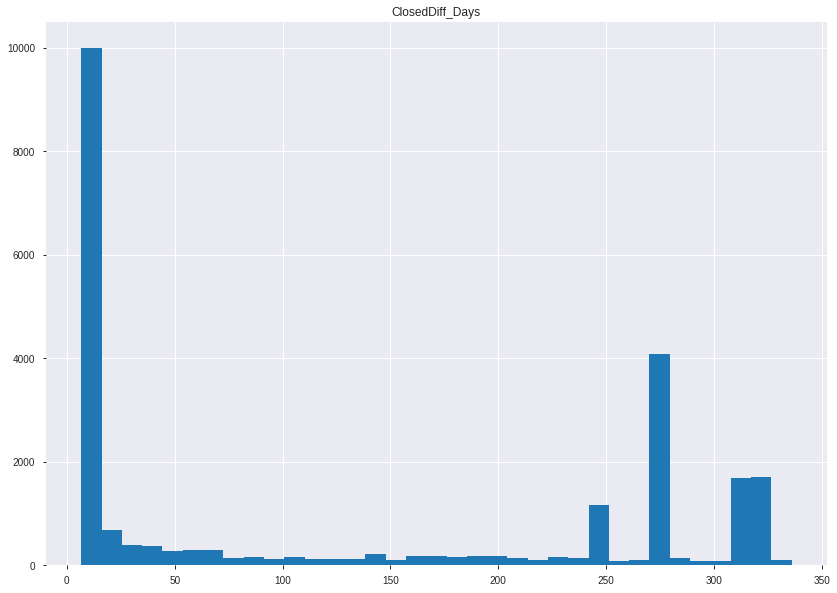

In [35]:
# for all ongoing requests, show how long they've been open for. As expected, the majority are recent

df2019_open.hist(column='ClosedDiff_Days', bins=35, figsize=(14, 10))

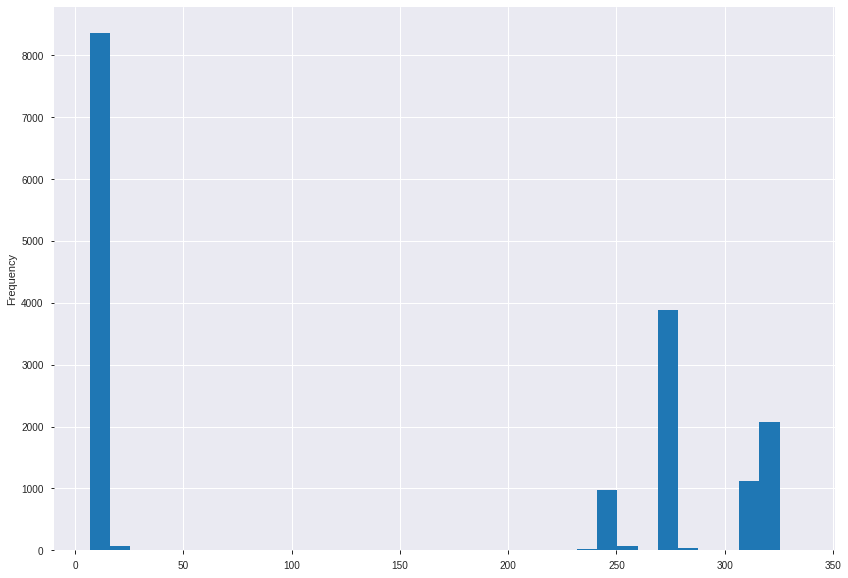

In [34]:
# these are for only the entries that has a  ServiceDate but not a ClosedDate
# there are disproportionate number of old requests that are still open; perhaps overlooked requests?

df2019_open.loc[df2019_open.ServiceDate.notna(), 'ClosedDiff_Days'].plot.hist(bins=35, figsize=(14,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad42778240>]],
      dtype=object)

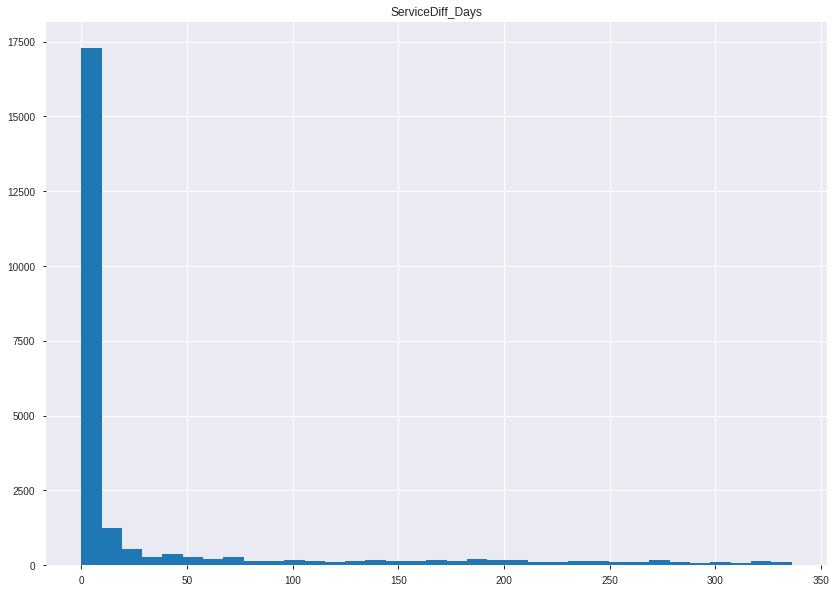

In [37]:
# these are for the entries that has NA for both service and closed dates

df2019_open.hist(column='ServiceDiff_Days', bins=35, figsize=(14, 10))

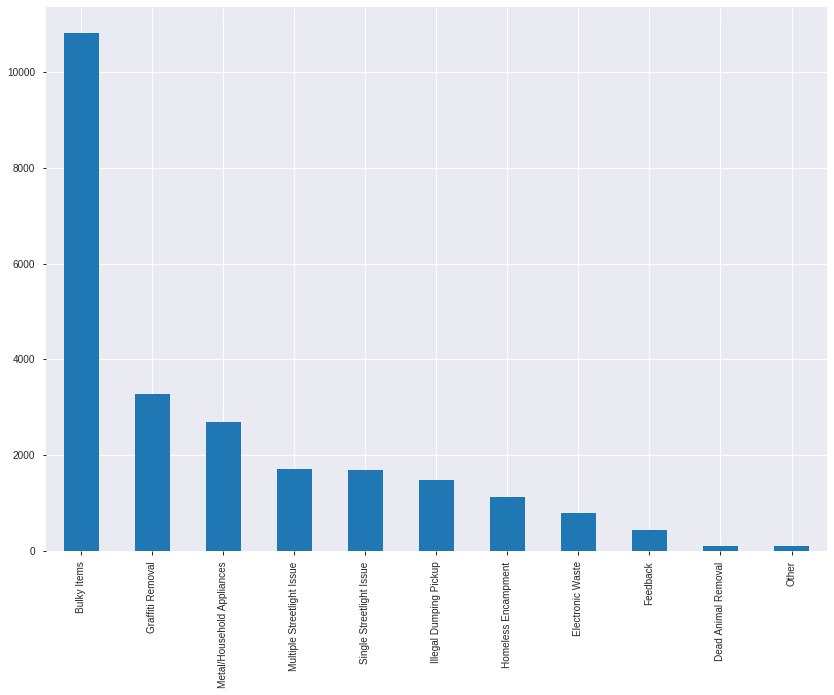

In [36]:
# open requests by RequestType

df2019_open['RequestType'].value_counts().plot(kind='bar', figsize=(14, 10))

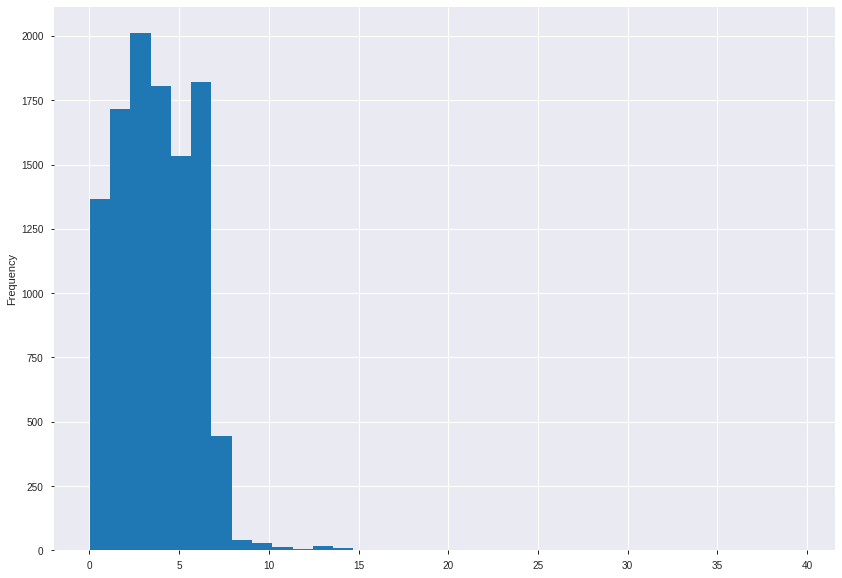

In [46]:
def plot_open_by_request(request,serviced=False):
    if serviced == 'both':
        df2019_open.loc[df2019_open['RequestType'] == request, 'ClosedDiff_Days'].plot.hist(bins=35, figsize=(14,10))
    elif serviced:
        df2019_open.loc[(df2019_open['RequestType'] == request) & (df2019_open.ServiceDate.notna()), 'ClosedDiff_Days'].plot.hist(bins=35, figsize=(14,10))
    else:
        df2019_open.loc[df2019_open['RequestType'] == request, 'ServiceDiff_Days'].plot.hist(bins=35, figsize=(14,10))

plot_open_by_request('Bulky Items', serviced=False)